In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
#Data Loading
X_train = pd.read_csv("X_train.csv") 
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv") 

#### Building the model

In [3]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))) 
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [4]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop])

Epoch 1/50


90/90 [==============================] - 1s 3ms/step - loss: 791178.5000 - accuracy: 0.5590 - val_loss: 45367.5000 - val_accuracy: 0.5576
Epoch 2/50
90/90 [==============================] - 0s 1ms/step - loss: 39782.5977 - accuracy: 0.5170 - val_loss: 55204.5117 - val_accuracy: 0.3801
Epoch 3/50
90/90 [==============================] - 0s 1ms/step - loss: 28315.7246 - accuracy: 0.5323 - val_loss: 15204.6836 - val_accuracy: 0.5421
Epoch 4/50
90/90 [==============================] - 0s 1ms/step - loss: 17186.9551 - accuracy: 0.5361 - val_loss: 16263.0439 - val_accuracy: 0.6293
Epoch 5/50
90/90 [==============================] - 0s 1ms/step - loss: 17598.0645 - accuracy: 0.5410 - val_loss: 7759.5693 - val_accuracy: 0.5732
Epoch 6/50
90/90 [==============================] - 0s 1ms/step - loss: 14541.5107 - accuracy: 0.5476 - val_loss: 20812.7871 - val_accuracy: 0.3614
Epoch 7/50
90/90 [==============================] - 0s 1ms/step - loss: 19876.2148 - accuracy: 0.5406 - val_lo

In [6]:
model.evaluate(X_train, y_train)


101/101 [==============================] - 0s 830us/step - loss: 8445.7012 - accuracy: 0.6054


[8445.701171875, 0.6054357886314392]

In [7]:
model.evaluate(X_test, y_test)

34/34 [==============================] - 0s 1ms/step - loss: 9930.4600 - accuracy: 0.6096


[9930.4599609375, 0.6095505356788635]

In [8]:
# Predict on the test set
y_pred_prob = model.predict(X_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC Score: {roc_auc}')

34/34 [==============================] - 0s 1ms/step
ROC AUC Score: 0.5233832335329341


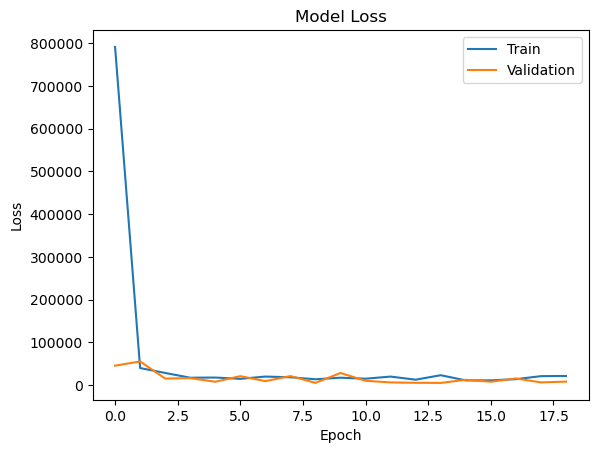

In [9]:
#plot the training and validation curve

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()